In [2]:
import numpy as np
import matplotlib.pyplot as pp
import matplotlib
%matplotlib inline

<h2> Plot Types </h2>

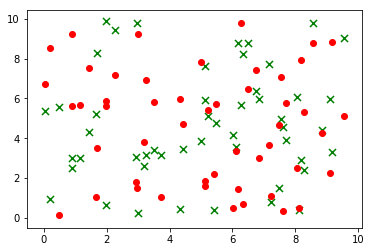

In [3]:
# Scatter
fig, axes = pp.subplots()
np.random.seed(10) # the seed allows to generate same set of random numbers 
x = np.random.rand(50) * 10
y1 = np.random.rand(50) *10
y2 = np.random.rand(50,) * 10
axes.scatter(x, y1, marker='x', color='g', s = 50) # s=size of the marker x
axes.scatter(x, y2, marker='o', color = 'r')

(array([ 0.00416835,  0.00750303,  0.03334679,  0.10254137,  0.15756357,
         0.21925512,  0.1675676 ,  0.09837302,  0.03001211,  0.01333871]),
 array([-4.6353381 , -3.43582223, -2.23630636, -1.03679049,  0.16272538,
         1.36224126,  2.56175713,  3.761273  ,  4.96078887,  6.16030474,
         7.35982062]),
 <a list of 10 Patch objects>)

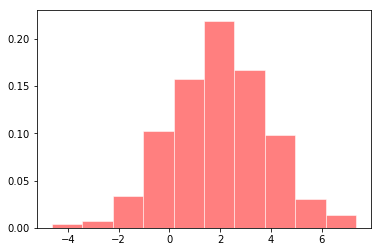

In [4]:
# Histogram
sample = np.random.normal(loc=2, scale=2, size= 1000)
fig, axes = pp.subplots()
# edgecolor is edgle of the bars and lw is the width of it. alpha is opacity
axes.hist(sample, bins=10, normed=True, lw='1', edgecolor ='w', color= 'r', alpha=0.5) 

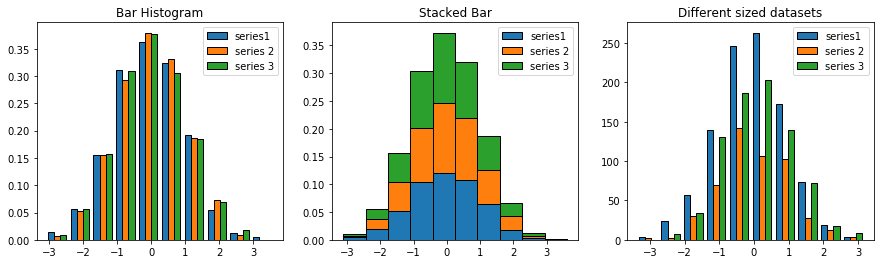

In [5]:
# Stacked Histogram
x = np.random.randn(1000, 3) # Create 3 sets of random numbers each having 1000 samples
fig, axes = pp.subplots(nrows=1, ncols=3, figsize=(15,4))
(axes1, axes2, axes3) = axes.flatten() # unpack the tuple

axes1.hist(x, bins=10, normed=True, histtype='bar',lw=1, edgecolor='k', label=('series1', 'series 2', 'series 3') )
axes1.legend()
axes1.set_title('Bar Histogram')

axes2.hist(x, bins=10, normed=True, histtype='barstacked', lw=1, edgecolor='k', label=('series1', 'series 2', 'series 3')  )
axes2.legend()
axes2.set_title('Stacked Bar')

# different sizes of series
x = [np.random.randn(n) for n in [1000, 500, 800]]
axes3.hist(x, bins=10, histtype='bar', lw=1, edgecolor='k', label=('series1', 'series 2', 'series 3'))
axes3.legend()
axes3.set_title('Different sized datasets')


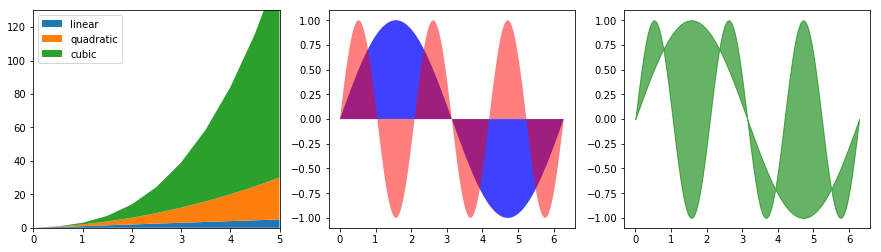

In [6]:
# Area plot
fig, axes = pp.subplots(nrows=1, ncols=3, figsize=(15,4))
(axes1,axes2, axes3) = axes.flatten()
x = np.linspace(0, 5, 11)
axes1.stackplot(x, x, x**2, x**3 , labels=('linear', 'quadratic', 'cubic'), cmap='coolwarm')
axes1.set_xbound(0,5)
axes1.set_ybound(0, 130)
axes1.legend(loc='upper left')

# Alernate way
x = np.linspace(0,2 * np.pi, 200) # split 0 to 360 degrees into 200 parts
y1 = np.sin(x)
y2 = np.sin(x * 3)
axes2.fill(x, y1, 'b', alpha=0.75)
axes2.fill(x, y2, 'r', alpha=0.5)

# fill between
axes3.fill_between(x, y1, y2,  color ='g', alpha=0.6)

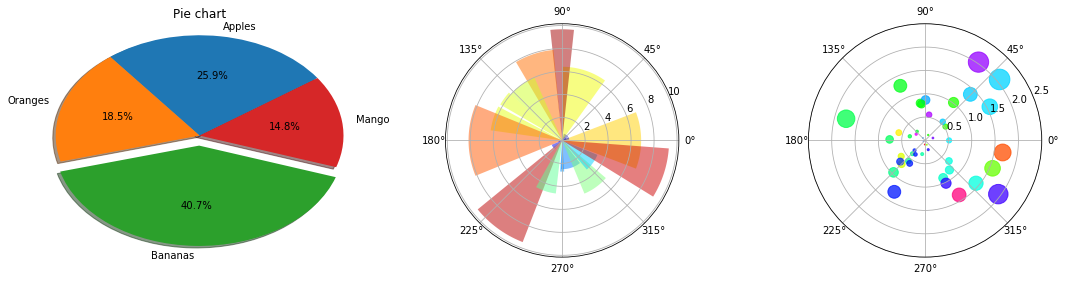

In [7]:
# Pie Chart and Polar Chart
fig, axes = pp.subplots(nrows=1, ncols=3, figsize = (15,4))
(axes1, axes2, axes3) = axes.flatten()

#Pie
labels = ['Apples', 'Oranges', 'Bananas', 'Mango']
proportion = [35,25,55,20] 
explode = [0,0, 0.1,0 ] # which index to explode for now we explode Bananas (idx:2)
axes1.pie(proportion, labels=labels, explode=explode, shadow=True, startangle=35, autopct='%1.1f% %')
axes1.axis('normal')
axes1.set_title('Pie chart')
fig.tight_layout()


# Polar
N = 20
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N) # we need range from 0 to 2pi (i.e 360 degree) in steps of 360/20.
radii = 10*np.random.rand(N) # random radios for each of the 20 parts
width = np.pi/4*np.random.rand(N) # width of each part 
axes2 = pp.subplot(132, polar= True)
bars = axes2.bar(theta, radii, width=width, bottom=0.0)

# for each radius and bar set different colors and opacity.
for r,bar in zip(radii, bars):
    bar.set_facecolor( pp.cm.jet(r/10.)) # pp.cm.jet will return a color map which we then index by r/10 to get a particular color
    bar.set_alpha(0.5)

# polar scatter
radii = np.random.randn(100)
theta = 2 * np.pi * np.random.randn(100)
area = 100 * (radii ** 2)
colors = theta
axes3 = pp.subplot(133, polar= True)
axes3.scatter(theta, radii, c =colors, s = area, cmap='hsv', alpha=0.75)

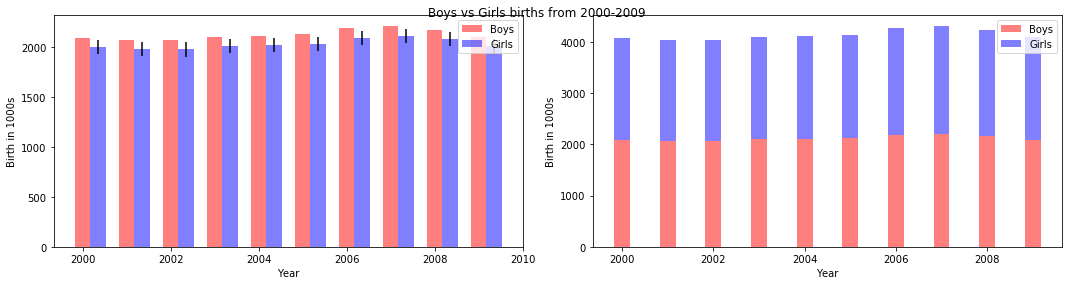

In [8]:
# Bar Chart
# Prepare Data
year = np.arange(2000, 2010)
boys = np.array([2085772, 2065725, 2063688, 2097895, 2109465, 2122493, 2186079, 2207257, 2169740, 2095910])
girls = np.array([1993329, 1978213, 1972065, 2003252, 2013908, 2024636, 2084511, 2109099, 2072756, 2001968])
girls_std = np.random.uniform(10) * 10
boys = boys/1000.0
girls = girls/1000.0

bar_width = 0.35

fig, axes = pp.subplots(nrows=1, ncols=2,figsize=(15,4))
(axes1, axes2) = axes.flatten()

#BAR
fig.suptitle('Boys vs Girls births from 2000-2009')
axes1.bar(year, boys, width=bar_width, color='r', alpha=0.5, label ='Boys')
# Note: we have to specify the X-value as year + bar_width since the bars for boys is shown at X
axes1.bar(year + bar_width, girls, width=0.35, color='b', alpha=0.5, yerr=girls_std, label='Girls')  
axes1.set_ylabel('Birth in 1000s')
axes1.set_xlabel('Year')
axes1.legend()

# STACKED BAR
axes2.bar(year, boys, width=bar_width, color='r', alpha=0.5, label ='Boys')
# Note: We have specified the bottom to be boys so that girls chart are stacked on top of the boys
axes2.bar(year, girls, width = bar_width, bottom=boys, color='b', alpha=0.5, label='Girls')
axes2.set_xlabel('Year')
axes2.set_ylabel('Birth in 1000s')
axes2.legend()

pp.tight_layout()

In [9]:
# 3D Plots, Contours and Color Maps (Heat Maps)
from mpl_toolkits.mplot3d import Axes3D

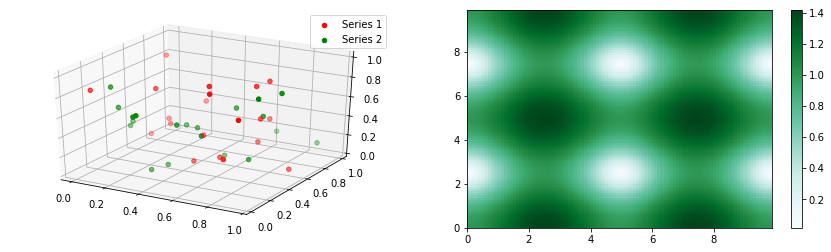

In [10]:
fig = pp.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,2,1,projection='3d')

np.random.seed(10)
points1= np.random.rand(3,20) # 3 coordinates and 20 such samples
ax1.scatter(points1[0], points1[1], points1[2], color='r', label='Series 1')

points2 = np.random.rand(3,20)
ax1.scatter(points2[0], points2[1], points2[2], color='g', label='Series 2')


#make legend
ax1.legend()




# Heat map
# 1. Prepare data
x = np.linspace(0.0, 2 * np.pi, 100)
y = np.linspace(0.0, 2 * np.pi, 100)
X, Y = np.meshgrid(x,y)
Z = np.sqrt(np.sin(X) ** 2 + np.cos(Y) ** 2)

ax2 = fig.add_subplot(1,2,2)
p = ax2.pcolor(X/2*np.pi , Y/2 * np.pi, Z, cmap = matplotlib.cm.BuGn, vmin=abs(Z).min(), vmax=abs(Z).max())
# color bar
fig.colorbar(p, ax=ax2)

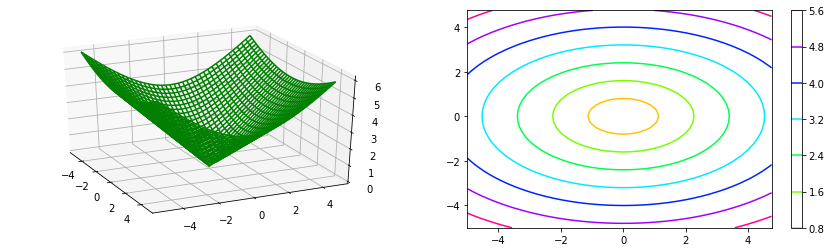

In [25]:
fig = pp.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,2,1,projection='3d')

x = np.arange(-5, 5 , 0.25)
y = np.arange(-5, 5 , 0.25)
X, Y = np.meshgrid(x,y)


Z = np.sqrt(  (X**2)/ 2 + Y **2)

ax1.plot_wireframe(X, Y, Z, rstride=1, cstride=1, colors='g')

ax2 = fig.add_subplot(1,2,2)
cs = ax2.contour(X, Y, Z, cmap=matplotlib.cm.hsv, vmin=abs(Z).min(), vmax=abs(Z).max())
fig.colorbar(cs, ax=ax2)

# Customize the viewing angle so its easier to see teh scatter points lie
# on the plane y=0
ax1.view_init(elev=30, azim=-25)


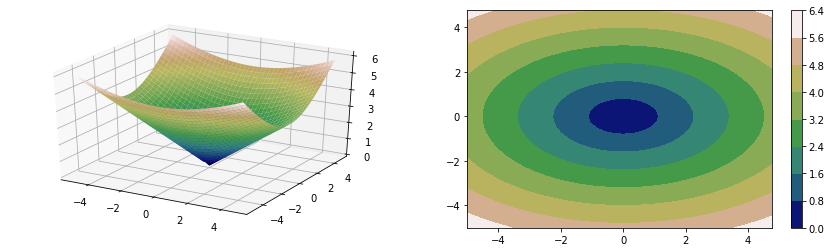

In [26]:
# Surface and Filled Contour
fig = pp.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,2,1,projection='3d')
ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.gist_earth)

ax2 = fig.add_subplot(1,2,2)
cs = ax2.contourf(X, Y, Z, cmap=matplotlib.cm.gist_earth, vmin=abs(Z).min(), vmax=abs(Z).max())
fig.colorbar(cs, ax= ax2)

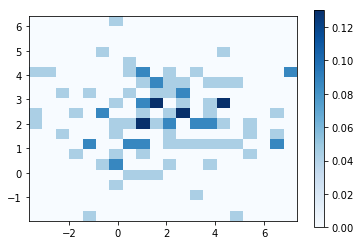

In [20]:
# Heat Map or correlation
fig, axes = pp.subplots()


# Create heatmap
x = np.random.normal(2, 2, 100)
y = np.random.normal(2, 2, 100)
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(20,20), normed=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]] # indicates the scale edges depending on the values in heatmap

im = axes.imshow(heatmap , cmap=matplotlib.cm.Blues, interpolation ='nearest', extent=extent)
fig.colorbar(im, ax=axes)